In [2]:
import pandas as pd
from csvCreator import get_readable_date
import numpy as np

In [3]:
def to_evenly_spaced(df):
    date = df['time'].apply(lambda x: get_readable_date(x))
    df.insert(loc=1, column='date', value=date)
    median = np.trunc(df.groupby('date').size().median())
    df.drop(['date'], axis=1, inplace=True)
    day = np.trunc(len(df.index) / median)
    new_last_index = int(median * day)

    even_time = []
    firs_time = df[['time']].iloc[1].values.item()
    for i in range(len(df.index)):
        even_time.append(firs_time)
        firs_time += 60
    df.drop(['time'], axis=1, inplace=True)
#     df.insert(loc=0, column='time', value=even_time)
    df = df.iloc[:new_last_index]
    return df.drop(['phq_2'], axis=1), df.drop(['phq_1'], axis=1), int(median)

In [4]:
def generator(data, look_b, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + look_b
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + look_b, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + look_b
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           look_b // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - look_b, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets


In [5]:
output_path = '/Volumes/hex/ST-1441993385-res/'
p = pd.read_csv(output_path + 'ST-1441993385_2.0.csv')

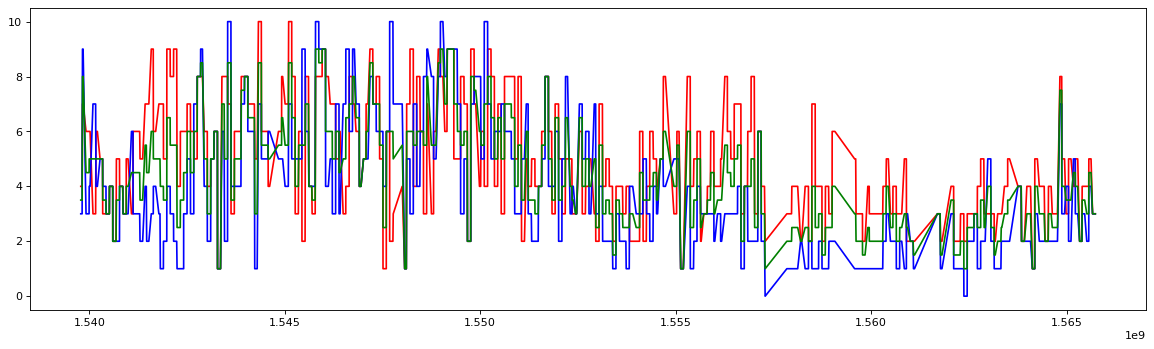

In [6]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [95]:
p.head()

,time,window,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1539780400,44,0.59,4.31,4.59,2.94,6.66,2.94,2.98,82.91,...,7,5,5,62,65,0,0,0,4,3
1,1539780444,89,-0.35,5.35,0.30,1.40,7.61,1.40,0.58,46.14,...,7,5,5,62,65,0,0,0,4,3
2,1539780533,57,-1.83,2.06,6.34,1.77,6.55,1.77,0.60,25.90,...,7,5,5,62,65,0,0,0,4,3
3,1539780590,57,-1.31,1.41,5.96,1.63,7.31,1.63,-0.84,28.71,...,7,5,5,62,65,0,0,0,4,3
4,1539780647,71,-1.63,1.24,6.45,1.45,6.76,1.45,-0.47,31.63,...,7,5,5,62,65,0,0,0,4,3


In [7]:
# just numerical data
p = p.drop(['date', 'window'], axis=1)
p_1, p_2, median = to_evenly_spaced(p)

In [8]:
float_data_1 = p_1.to_numpy()
p_1.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1
0,0.59,4.31,4.59,2.94,6.66,2.94,2.98,82.91,1.87,44.87,...,7,7,5,5,62,65,0,0,0,4
1,-0.35,5.35,0.30,1.40,7.61,1.40,0.58,46.14,0.06,116.84,...,7,7,5,5,62,65,0,0,0,4
2,-1.83,2.06,6.34,1.77,6.55,1.77,0.60,25.90,0.90,30.98,...,7,7,5,5,62,65,0,0,0,4
3,-1.31,1.41,5.96,1.63,7.31,1.63,-0.84,28.71,-0.46,41.61,...,7,7,5,5,62,65,0,0,0,4
4,-1.63,1.24,6.45,1.45,6.76,1.45,-0.47,31.63,-0.36,14.54,...,7,7,5,5,62,65,0,0,0,4


In [9]:
float_data_2 = p_2.to_numpy()
p_2.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_2
0,0.59,4.31,4.59,2.94,6.66,2.94,2.98,82.91,1.87,44.87,...,7,7,5,5,62,65,0,0,0,3
1,-0.35,5.35,0.30,1.40,7.61,1.40,0.58,46.14,0.06,116.84,...,7,7,5,5,62,65,0,0,0,3
2,-1.83,2.06,6.34,1.77,6.55,1.77,0.60,25.90,0.90,30.98,...,7,7,5,5,62,65,0,0,0,3
3,-1.31,1.41,5.96,1.63,7.31,1.63,-0.84,28.71,-0.46,41.61,...,7,7,5,5,62,65,0,0,0,3
4,-1.63,1.24,6.45,1.45,6.76,1.45,-0.47,31.63,-0.36,14.54,...,7,7,5,5,62,65,0,0,0,3


In [10]:
median

744

In [11]:
# first 200 days as training
mean = float_data_1[:90400].mean(axis=0)
float_data_1 -= mean
std = float_data_1[:90400].std(axis=0)
float_data_1 /= std

In [12]:
# first 200 days as training
mean = float_data_2[:90400].mean(axis=0)
float_data_2 -= mean
std = float_data_2[:90400].std(axis=0)
float_data_2 /= std

In [13]:
float_data_1[0]

array([ 0.0623853 ,  1.06967368,  0.71315954,  0.6531084 ,  1.44435844,
        0.6531084 ,  2.20837604,  1.37265471,  1.46946923,  1.45253117,
       -1.69812121,  1.41394362, -0.14328428, -0.24303247,  0.1176802 ,
       -0.2271475 , -0.10525849, -0.01254685,  0.85614371,  0.34286213,
        0.11767957, -0.27245931, -0.83058376, -0.0642938 , -0.37660474,
       -0.06017475,  0.67152374,  0.06697725, -4.60231214,  1.65040642,
        0.0674456 , -0.2656833 , -0.35114941, -0.9611407 , -0.92304911])

In [103]:
float_data_2[0]

array([ 0.0623853 ,  1.06967368,  0.71315954,  0.6531084 ,  1.44435844,
        0.6531084 ,  2.20837604,  1.37265471,  1.46946923,  1.45253117,
       -1.69812121,  1.41394362, -0.14328428, -0.24303247,  0.1176802 ,
       -0.2271475 , -0.10525849, -0.01254685,  0.85614371,  0.34286213,
        0.11767957, -0.27245931, -0.83058376, -0.0642938 , -0.37660474,
       -0.06017475,  0.67152374,  0.06697725, -4.60231214,  1.65040642,
        0.0674456 , -0.2656833 , -0.35114941, -0.9611407 , -0.95060527])

In [14]:
# assume each day got 744 value (average value) that means 17 value per Hour.
# most probably will be 3
# step = 60 / (median / 24)
step = 2
# observations will look back 7 days (average)
look_back = step * 7 * 24
delay = 24 * step

# one day
batch_size = median

In [15]:
batch_size

744

In [16]:
# for phq-1
train_gen_1 = generator(float_data_1,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=137640,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_1 = generator(float_data_1,
                    look_b=look_back,
                    delay=delay,
                    min_index=137641,
                    max_index=167400,
                    step=step,
                    batch_size=batch_size)
test_gen_1 = generator(float_data_1,
                     look_b=look_back,
                     delay=delay,
                     min_index=167401,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


In [17]:
# for phq-1
train_gen_2 = generator(float_data_2,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=137640,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_2 = generator(float_data_2,
                    look_b=look_back,
                    delay=delay,
                    min_index=137641,
                    max_index=167400,
                    step=step,
                    batch_size=batch_size)
test_gen_2 = generator(float_data_2,
                     look_b=look_back,
                     delay=delay,
                     min_index=167401,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [18]:
test_steps = (len(p.index) - 167401)//batch_size
val_steps = (167400 - 137640)//batch_size
per_epoch =137640//batch_size
per_epoch

185

In [19]:
val_steps 

40

In [20]:
test_steps

30

In [21]:
def evaluate_naive_model(v_gen):
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(v_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [26]:
evaluate_naive_model(val_gen_1)

1.4569650165082861


In [25]:
evaluate_naive_model(val_gen_2)

1.6850945569578926


# One GRU layer Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [48]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimzer=RMSprop(), loss='mae')
history = model.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 185 steps, validate for 39 steps
Epoch 1/20
185/185 [==============================] - 87s 471ms/step - loss: 0.2445 - val_loss: 0.1263
Epoch 2/20
185/185 [==============================] - 83s 447ms/step - loss: 0.1221 - val_loss: 0.1128
Epoch 3/20
185/185 [==============================] - 82s 444ms/step - loss: 0.1091 - val_loss: 0.0987
Epoch 4/20
185/185 [==============================] - 82s 441ms/step - loss: 0.1046 - val_loss: 0.0948
Epoch 5/20
185/185 [==============================] - 82s 445ms/step - loss: 0.1004 - val_loss: 0.0882
Epoch 6/20
185/185 [==============================] - 82s 445ms/step - loss: 0.0991 - val_loss: 0.0828
Epoch 7/20
185/185 [==============================] - 82s 444ms/step - loss: 0.0944 - val_loss: 0.0813
Epoch 8/20
185/185 [==============================] - 85s 461ms/step - loss: 0.0955 - val_loss: 0.0852
Epoch 9/20
185/185 [==============================] - 82s 444ms/step - loss: 0.0936 - val_loss: 0.0891
Epoch 10/20
185/185 [=========

In [49]:
model.save('model_1_385.h5')

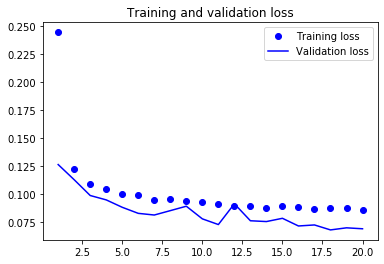

In [51]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [52]:
model.evaluate(test_gen, steps=30)

30/30 [==============================] - 5s 153ms/step - loss: 0.0609


0.06091373264789581

# One GRU unit for phq-2

In [125]:
model_1_2 = Sequential()
model_1_2.add(layers.GRU(32, input_shape=(None, float_data_2.shape[-1])))
model_1_2.add(layers.Dense(1))

model_1_2.compile(optimzer=RMSprop(), loss='mae')
history_1_2 = model_1_2.fit(train_gen_2,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_2,
                    validation_steps=val_steps)


Train for 185 steps, validate for 40 steps
Epoch 1/20
185/185 [==============================] - 94s 507ms/step - loss: 0.2297 - val_loss: 0.1080
Epoch 2/20
185/185 [==============================] - 85s 459ms/step - loss: 0.1048 - val_loss: 0.0977
Epoch 3/20
185/185 [==============================] - 87s 469ms/step - loss: 0.0942 - val_loss: 0.0943
Epoch 4/20
185/185 [==============================] - 101s 547ms/step - loss: 0.0886 - val_loss: 0.0696
Epoch 5/20
185/185 [==============================] - 87s 469ms/step - loss: 0.0838 - val_loss: 0.0837
Epoch 6/20
185/185 [==============================] - 84s 456ms/step - loss: 0.0821 - val_loss: 0.0856
Epoch 7/20
185/185 [==============================] - 86s 466ms/step - loss: 0.0803 - val_loss: 0.0840
Epoch 8/20
185/185 [==============================] - 85s 460ms/step - loss: 0.0783 - val_loss: 0.0860
Epoch 9/20
185/185 [==============================] - 88s 475ms/step - loss: 0.0774 - val_loss: 0.0557
Epoch 10/20
185/185 [========

In [126]:
model.save('model_1_2_385.h5')

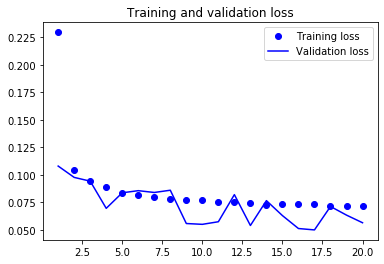

In [127]:
loss = history_1_2.history['loss']
val_loss = history_1_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [128]:
model_1_2.evaluate(test_gen, steps=30)

30/30 [==============================] - 5s 167ms/step - loss: 0.0661


0.06612895944466193

# 1D convenet

In [53]:
model_2 = Sequential()
model_2.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())
model_2.add(layers.Dense(1))

model_2.compile(optimizer=RMSprop(), loss='mae')
history_2 = model_2.fit(train_gen,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen,
                        validation_steps=val_steps)

Train for 500 steps, validate for 39 steps
Epoch 1/20
500/500 [==============================] - 94s 188ms/step - loss: 0.3001 - val_loss: 0.2718
Epoch 2/20
500/500 [==============================] - 96s 191ms/step - loss: 0.1986 - val_loss: 0.2923
Epoch 3/20
500/500 [==============================] - 99s 198ms/step - loss: 0.1730 - val_loss: 0.2874
Epoch 4/20
500/500 [==============================] - 91s 182ms/step - loss: 0.1579 - val_loss: 0.3264
Epoch 5/20
500/500 [==============================] - 91s 181ms/step - loss: 0.1470 - val_loss: 0.3588
Epoch 6/20
500/500 [==============================] - 91s 182ms/step - loss: 0.1414 - val_loss: 0.2555
Epoch 7/20
500/500 [==============================] - 92s 183ms/step - loss: 0.1353 - val_loss: 0.3301
Epoch 8/20
500/500 [==============================] - 91s 183ms/step - loss: 0.1295 - val_loss: 0.3377
Epoch 9/20
500/500 [==============================] - 91s 183ms/step - loss: 0.1260 - val_loss: 0.3450
Epoch 10/20
500/500 [=========

In [54]:
model_2.save('model_2_358.h5') 

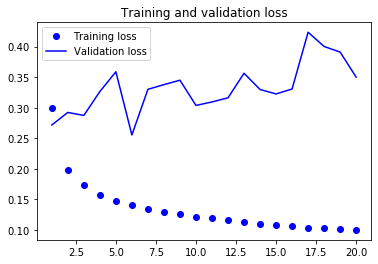

In [55]:
import matplotlib.pyplot as plt
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
model_2.evaluate(test_gen, steps=30)

30/30 [==============================] - 3s 89ms/step - loss: 0.3324


0.3323956700662772

# 1D convnet and GRU model

In [60]:

model_3 = Sequential()
model_3.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data.shape[-1])))
model_3.add(layers.MaxPooling1D(3))
model_3.add(layers.Conv1D(32, 5, activation='relu'))
model_3.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model_3.add(layers.Dense(1))

model_3.summary()
model_3.compile(optimizer=RMSprop(), loss='mae')
history_3 = model_3.fit(train_gen,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen,
                        validation_steps=val_steps)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 32)          5632      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Train for 500 steps, validate for 39 steps
Epoch 1/20
 49/500 [=>............................] - ETA: 2:39 - loss: 6

KeyboardInterrupt: 

In [177]:
model_3.save('model_3.h5') 

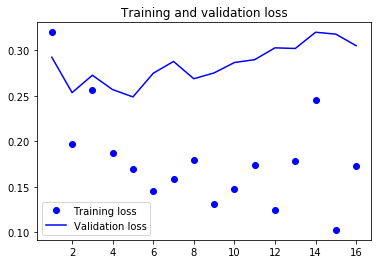

In [51]:
loss = history_3.history['loss'][1:-3]
val_loss = history_3.history['val_loss'][1:-3]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [186]:
model_3.evaluate(test_gen, steps=30)

30/30 [==============================] - 2s 66ms/step - loss: 0.5556


0.5556494179336975

In [129]:
model_7 = Sequential()
model_7.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_7.add(layers.MaxPooling1D(3))
model_7.add(layers.Conv1D(32, 5, activation='relu'))
model_7.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_7.add(layers.Dense(1))

model_7.summary()
model_7.compile(optimizer=RMSprop(), loss='mae')
history_7 = model_7.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=10,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, None, 32)          5632      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          5152      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Train for 185 steps, validate for 40 steps
Epoch 1/10
185/185 [==============================] - 70s 376ms/step - lo

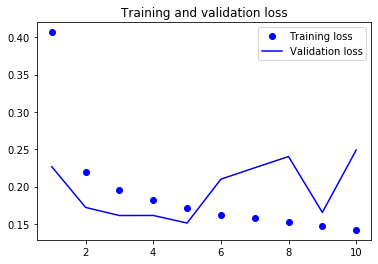

In [131]:
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [130]:
model_7.evaluate(test_gen, steps=30)

30/30 [==============================] - 4s 129ms/step - loss: 0.1921


0.19211864272753398

# One GRU layer with recurrent dropout

In [61]:
model_4 = Sequential()
model_4.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data.shape[-1])))
model_4.add(layers.Dense(1))

model_4.compile(optimizer=RMSprop(), loss='mae')
history_4 = model_4.fit(train_gen,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)


Train for 185 steps, validate for 39 steps
Epoch 1/20
185/185 [==============================] - 110s 594ms/step - loss: 36.2539 - val_loss: 1.5728
Epoch 2/20
185/185 [==============================] - 109s 589ms/step - loss: 0.7588 - val_loss: 0.4079
Epoch 3/20
185/185 [==============================] - 109s 591ms/step - loss: 0.2695 - val_loss: 0.1903
Epoch 4/20
185/185 [==============================] - 110s 592ms/step - loss: 1.3888 - val_loss: 0.1644
Epoch 5/20
185/185 [==============================] - 109s 589ms/step - loss: 0.1786 - val_loss: 0.1639
Epoch 6/20
185/185 [==============================] - 110s 595ms/step - loss: 0.3737 - val_loss: 0.1547
Epoch 7/20
185/185 [==============================] - 112s 604ms/step - loss: 0.2996 - val_loss: 0.1534
Epoch 8/20
185/185 [==============================] - 129s 696ms/step - loss: 0.1693 - val_loss: 0.1451
Epoch 9/20
185/185 [==============================] - 117s 632ms/step - loss: 0.3416 - val_loss: 0.1553
Epoch 10/20
185/185 

In [62]:
model_4.save('model_4_385.h5') 

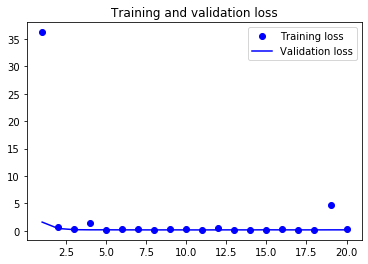

In [63]:
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

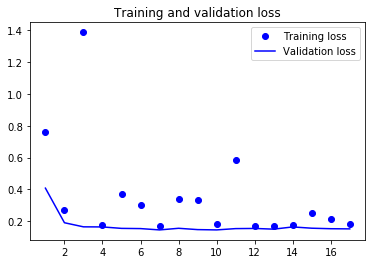

In [64]:
loss = history_4.history['loss'][1:-2]
val_loss = history_4.history['val_loss'][1:-2]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
model_4.evaluate(test_gen, steps=30)

30/30 [==============================] - 5s 157ms/step - loss: 0.1338


0.13379748730609814

In [66]:
model_5 = Sequential()
model_5.add(layers.Conv1D(64, 5, activation='relu',
                          input_shape=(None, float_data.shape[-1])))
model_5.add(layers.MaxPooling1D(3))
model_5.add(layers.Conv1D(64, 5, activation='relu'))
model_5.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.2))
model_5.add(layers.Dense(1))

model_5.summary()
model_5.compile(optimizer=RMSprop(), loss='mae')
history_5 = model_5.fit(train_gen,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen,
                        validation_steps=val_steps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, None, 64)          11264     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 64)          20544     
_________________________________________________________________
gru_5 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 56,833
Trainable params: 56,833
Non-trainable params: 0
_________________________________________________________________
Train for 185 steps, validate for 39 steps
Epoch 1/20
185/185 [==============================] - 110s 594ms/step - l

In [67]:
model_5.save('model_5_385.h5') 

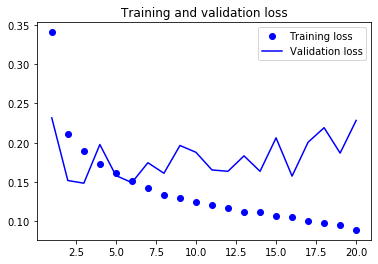

In [68]:
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [69]:
model_5.evaluate(test_gen, steps=30)

30/30 [==============================] - 5s 163ms/step - loss: 0.1834


0.18339727918306986

In [70]:
model_6 = Sequential()
model_6.add(layers.LSTM(10,input_shape=(None, float_data.shape[-1])))
model_6.add(layers.Dense(1, activation='linear'))

model_6.summary()
model_6.compile(optimizer='adam', loss='mse')
history_6 = model_6.fit(train_gen,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen,
                        validation_steps=val_steps)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1840      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,851
Trainable params: 1,851
Non-trainable params: 0
_________________________________________________________________
Train for 185 steps, validate for 39 steps
Epoch 1/20
185/185 [==============================] - 48s 261ms/step - loss: 0.4964 - val_loss: 0.1785
Epoch 2/20
185/185 [==============================] - 46s 249ms/step - loss: 0.1493 - val_loss: 0.1246
Epoch 3/20
185/185 [==============================] - 46s 251ms/step - loss: 0.1186 - val_loss: 0.1112
Epoch 4/20
185/185 [==============================] - 44s 240ms/step - loss: 0.1072 - val_loss: 0.1080
Epoch 5/20
185/185 [==============================] - 45s 2

In [74]:
model_5.save('model_6_385.h5') 

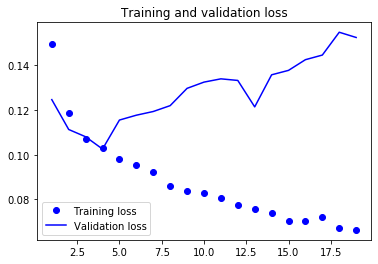

In [75]:
loss = history_6.history['loss'][1:]
val_loss = history_6.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
model_6.evaluate(test_gen, steps=30)

30/30 [==============================] - 3s 112ms/step - loss: 0.1231


0.12305418172230323